Name: Joshua Lindsey

Date: 2025/05/31

Project Name: Loan Eligibility Predction using Machine Learning Models in Python

Source: https://www.geeksforgeeks.org/loan-eligibility-prediction-using-machine-learning-models-in-python/

In [32]:
# Step 1: Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from imblearn.over_sampling import RandomOverSampler 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
#from xgboost import XGBRegressor
#from sklearn.linear_model import LinearRegression, Lasso, Ridge
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.metrics import mean_absolute_error as mae

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Step 2: Load Data

df = pd.read_csv('loan_data.csv')
df.head()

,Loan_ID,Gender,Married,ApplicantIncome,LoanAmount,Loan_Status
0,LP001002,Male,No,5849,NaN,Y
1,LP001003,Male,Yes,4583,128.0,N
2,LP001005,Male,Yes,3000,66.0,Y
3,LP001006,Male,Yes,2583,120.0,Y
4,LP001008,Male,No,6000,141.0,Y


In [6]:
# See the shape of the dataset
df.shape

(598, 6)

In [7]:
# print the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Loan_ID          598 non-null    object 
 1   Gender           598 non-null    object 
 2   Married          598 non-null    object 
 3   ApplicantIncome  598 non-null    int64  
 4   LoanAmount       577 non-null    float64
 5   Loan_Status      598 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 28.2+ KB


In [8]:
# To get values like the mean, count, and min of the column use describe()
df.describe()

,ApplicantIncome,LoanAmount
count,598.000000,577.000000
mean,5292.252508,144.968804
std,5807.265364,82.704182
min,150.000000,9.000000
25%,2877.500000,100.000000
50%,3806.000000,127.000000
75%,5746.000000,167.000000
max,81000.000000,650.000000


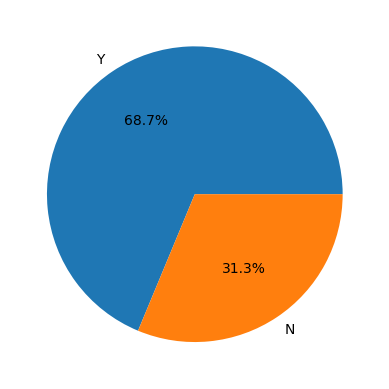

In [9]:
# Step 3: Exploratory Data Analysis

temp = df['Loan_Status'].value_counts()
plt.pie(temp.values,
        labels=temp.index,
        autopct='%1.1f%%')
plt.show()

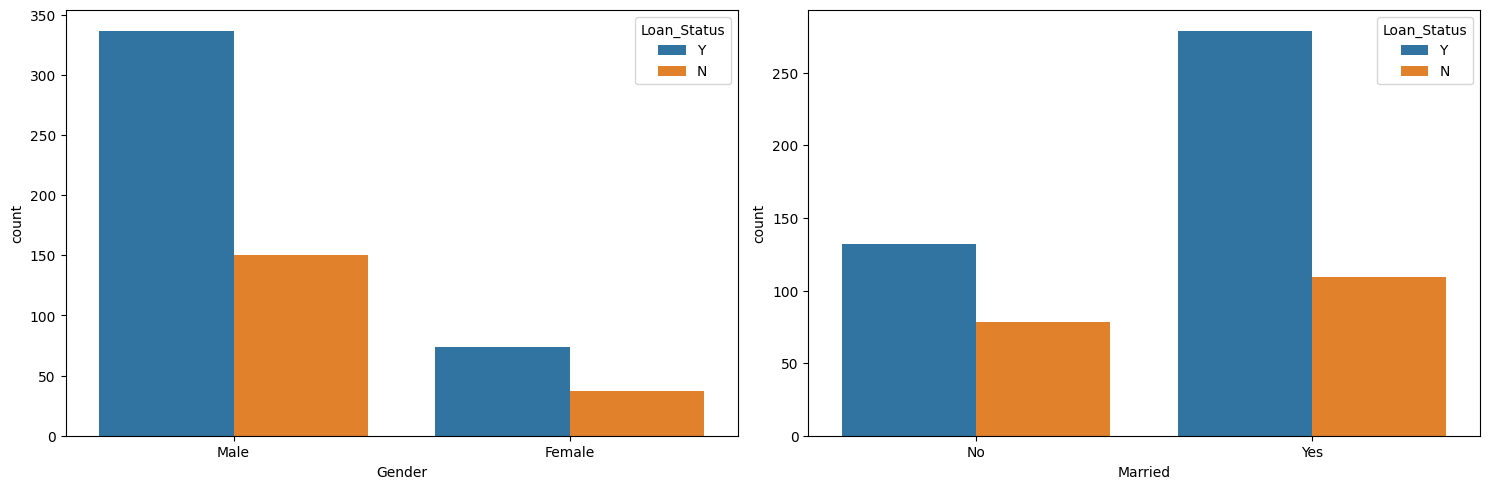

In [12]:
# We have an inbalanced dataset. We will have to balance it out before training the model

plt.subplots(figsize=(15,5))
for i,col in enumerate(['Gender','Married']):
    plt.subplot(1,2, i+1)
    sns.countplot(data=df, x = col, hue='Loan_Status')
plt.tight_layout()
plt.show()


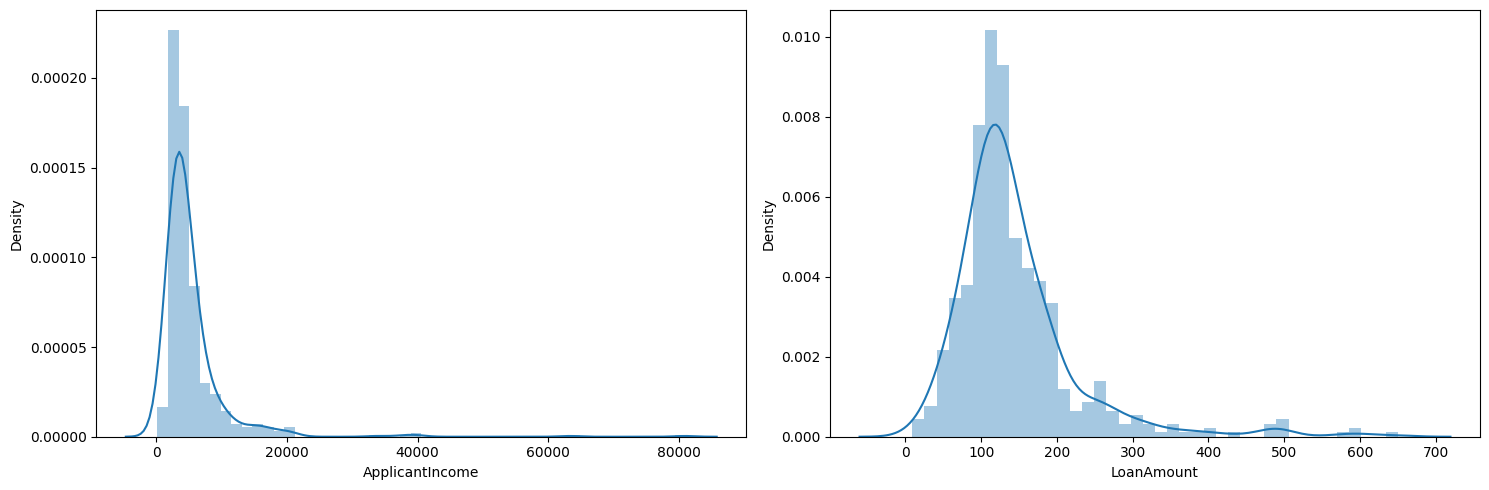

In [13]:
plt.subplots(figsize=(15,5))
for i,col in enumerate(['ApplicantIncome','LoanAmount']):
    plt.subplot(1,2,i+1)
    sns.distplot(df[col])
plt.tight_layout()
plt.show()

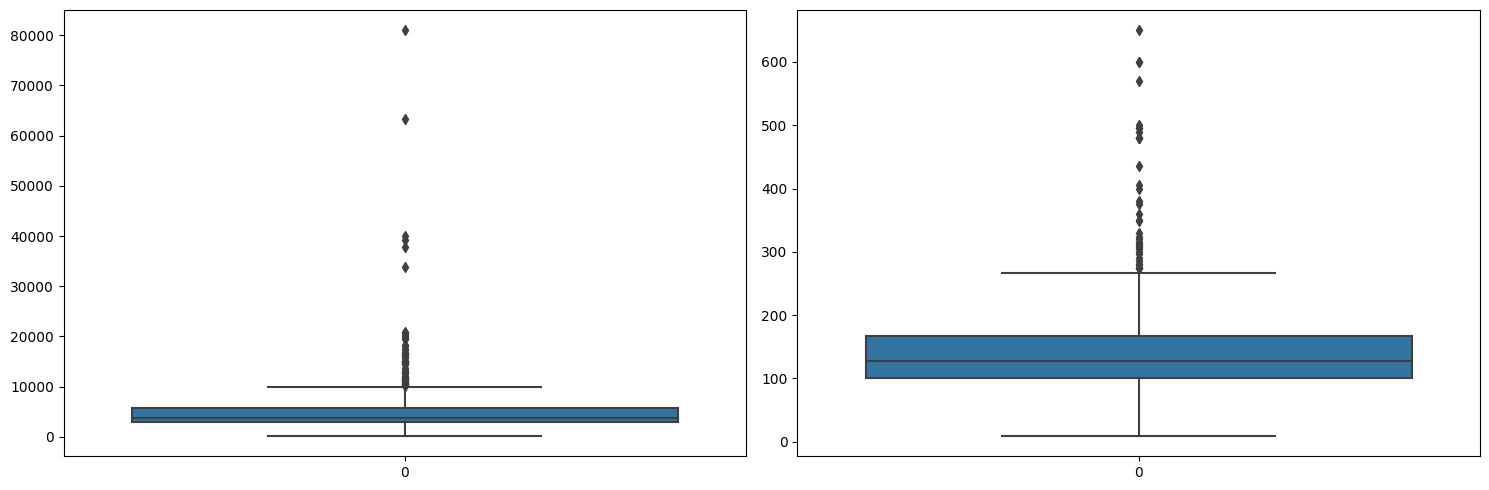

In [14]:
# To find outliers in the columns, we can use boxplot

plt.subplots(figsize=(15,5))
for i,col in enumerate(['ApplicantIncome','LoanAmount']):
    plt.subplot(1,2,i+1)
    sns.boxplot(df[col])
plt.tight_layout()
plt.show()

In [16]:
# There are some extreme outlier's in the data we need to remove them

df = df[df['ApplicantIncome'] < 25000]
df = df[df['LoanAmount'] < 400000]

df.groupby('Gender').mean(numeric_only=True)['LoanAmount']


Gender
Female    126.697248
Male      146.872294
Name: LoanAmount, dtype: float64

In [17]:
df.groupby(['Married','Gender']).mean(numeric_only=True)['LoanAmount']

Married  Gender
No       Female    116.115385
         Male      135.959677
Yes      Female    153.322581
         Male      150.875740
Name: LoanAmount, dtype: float64

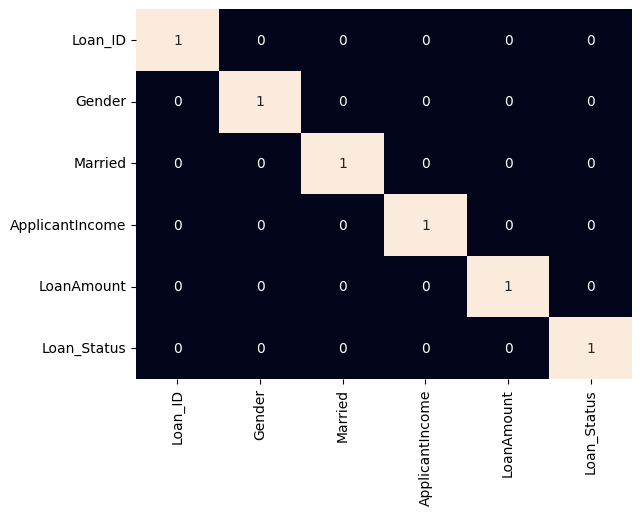

In [ ]:
# Function to apply label encoding

def encode_labels(data):
    for col in data.columns:
        if data[col].dtype == 'object':
            le = LabelEncoder()
            data[col] = le.fit_transform(data[col])
    return data

# Applying function in whole column
df = encode_labels(df)

# Generate Heatmap
sns.heatmap(df.corr() > 0.8, annot=True, cbar=False)
plt.show()


In [24]:
# Step 4: Data Preprocessing

features = df.drop('Loan_Status', axis=1)
target = df['Loan_Status'].values

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=10)

ros = RandomOverSampler(sampling_strategy='minority', random_state=0)

x, y = ros.fit_resample(x_train, y_train)

x_train.shape, x.shape

((456, 5), (638, 5))

In [25]:
# We will now normalize the features for stable and fast training

scaler = StandardScaler()
x = scaler.fit_transform(x)
x_test = scaler.transform(x_test)

In [28]:
# Step 5: Model Development

model = SVC(kernel='rbf')
model.fit(x,y)

print('Training accuracy: {}'.format(metrics.roc_auc_score(y, model.predict(x))))
print('Testing accuracy: {}'.format(metrics.roc_auc_score(y_test, model.predict(x_test))))

Training accuracy: 0.6300940438871474
Testing accuracy: 0.48198198198198194


In [30]:
# Step 6: Model Evaluation

training_roc_auc = roc_auc_score(y, model.predict(x))
validation_roc_auc = roc_auc_score(y_test, model.predict(x_test))

print('Training ROC AUC score: {}'.format(training_roc_auc))
print('Testing ROC AUC score: {}'.format(validation_roc_auc))
print()
cm = confusion_matrix(y_test, model.predict(x_test))

Training ROC AUC score: 0.6300940438871474
Testing ROC AUC score: 0.48198198198198194



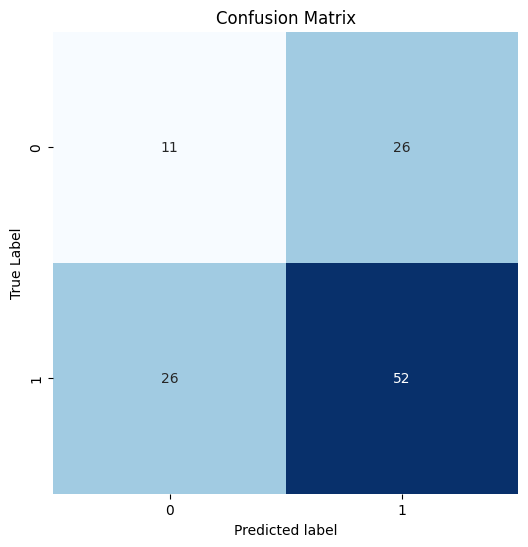

In [31]:
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True Label')
plt.show()

In [33]:
print(classification_report(y_test, model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.30      0.30      0.30        37
           1       0.67      0.67      0.67        78

    accuracy                           0.55       115
   macro avg       0.48      0.48      0.48       115
weighted avg       0.55      0.55      0.55       115

